<a href="https://colab.research.google.com/github/islavathnaveennaik/project_Cardekho/blob/main/project_Cardekho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#The project's primary objective is to create a data science solution for accurately predicting used car prices by analyzing a diverse dataset including car model, no. of owners, age, mileage, fuel type, kilometers driven, features, and location. The aim is to build a machine-learning model that allows users to find current valuations for used cars.

#Step 1: Import Libraries and Load Data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

# Load the Excel file
file_path = '/content/kolkata_cars.xlsx'  # Update with your file path
df = pd.read_excel(file_path, sheet_name='kolkata_cars.csv')

# Display the first few rows
print(df.head())

#Step 2: Data Understanding and Preprocessing
Check for Missing Values and Data Types

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.info())

new_car_detail      0
new_car_overview    0
new_car_feature     0
new_car_specs       0
car_links           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   new_car_detail    1381 non-null   object
 1   new_car_overview  1381 non-null   object
 2   new_car_feature   1381 non-null   object
 3   new_car_specs     1381 non-null   object
 4   car_links         1381 non-null   object
dtypes: object(5)
memory usage: 54.1+ KB
None


#Extract Relevant Features


In [ ]:
# Extract relevant features from 'new_car_detail'
# Assuming 'new_car_detail' is a column containing dictionaries
# If it's a different data structure, adjustments will be needed

# Check if 'new_car_detail' column exists
if 'new_car_detail' in df.columns:
    df['fuel_type'] = df['new_car_detail'].apply(lambda x: x.get('ft', np.nan) if isinstance(x, dict) else np.nan)
    df['body_type'] = df['new_car_detail'].apply(lambda x: x.get('bt', np.nan) if isinstance(x, dict) else np.nan)
    df['km_driven'] = df['new_car_detail'].apply(lambda x: x.get('km', np.nan) if isinstance(x, dict) else np.nan)
    df['transmission'] = df['new_car_detail'].apply(lambda x: x.get('transmission', np.nan) if isinstance(x, dict) else np.nan)
    df['owner'] = df['new_car_detail'].apply(lambda x: x.get('owner', np.nan) if isinstance(x, dict) else np.nan)
# Extract relevant features from 'new_car_detail'
# Assuming 'new_car_detail' is a column containing dictionaries
# If it's a different data structure, adjustments will be needed

# Check if 'new_car_detail' column exists
if 'new_car_detail' in df.columns:
    df['fuel_type'] = df['new_car_detail'].apply(lambda x: x.get('ft', np.nan) if isinstance(x, dict) else np.nan)
    df['body_type'] = df['new_car_detail'].apply(lambda x: x.get('bt', np.nan) if isinstance(x, dict) else np.nan)
    df['km_driven'] = df['new_car_detail'].apply(lambda x: x.get('km', np.nan) if isinstance(x, dict) else np.nan)
    df['transmission'] = df['new_car_detail'].apply(lambda x: x.get('transmission', np.nan) if isinstance(x, dict) else np.nan)
    df['owner'] = df['new_car_detail'].apply(lambda x: x.get('owner', np.nan) if isinstance(x, dict) else np.nan)
    df['oem'] = df['new_car_detail'].apply(lambda x: x.get('oem', np.nan) if isinstance(x, dict) else np.nan)
    df['model'] = df['new_car_detail'].apply(lambda x: x.get('model', np.nan) if isinstance(x, dict) else np.nan)
    df['model_year'] = df['new_car_detail'].apply(lambda x: x.get('modelYear', np.nan) if isinstance(x, dict) else np.nan)

In [ ]:
# Convert 'price' column to string type before applying string operations
df['price'] = df['price'].astype(str)

# Convert price to numeric

In [ ]:
# Drop unnecessary columns
# These columns are probably already removed or renamed after extracting features in the previous cell.
# Instead, drop only 'new_car_detail' if it still exists.
try:
    df = df.drop(columns=['new_car_detail'])
except KeyError:
    print("Column 'new_car_detail' already dropped or doesn't exist.")

# If you still want to remove specific columns, double-check their names in the DataFrame:
# print(df.columns)  # Print the current columns of the DataFrame
# Then drop the columns that actually exist using their correct names.

In [ ]:
# Display the cleaned dataframe
print(df.head())

   fuel_type  body_type  km_driven  transmission  owner  oem  model  \
0        NaN        NaN        NaN           NaN    NaN  NaN    NaN   
1        NaN        NaN        NaN           NaN    NaN  NaN    NaN   
2        NaN        NaN        NaN           NaN    NaN  NaN    NaN   
3        NaN        NaN        NaN           NaN    NaN  NaN    NaN   
4        NaN        NaN        NaN           NaN    NaN  NaN    NaN   

   model_year price  
0         NaN   nan  
1         NaN   nan  
2         NaN   nan  
3         NaN   nan  
4         NaN   nan  


#Extract Relevant Features

In [ ]:
# Fill missing values (if any)
# Check if 'km_driven' is not already numeric (float)
if not pd.api.types.is_numeric_dtype(df['km_driven']):
    df['km_driven'] = df['km_driven'].str.replace(',', '', regex=False).astype(float)
df['km_driven'].fillna(df['km_driven'].median(), inplace=True)

#Exploratory Data Analysis (EDA)
Distribution of Target Variable

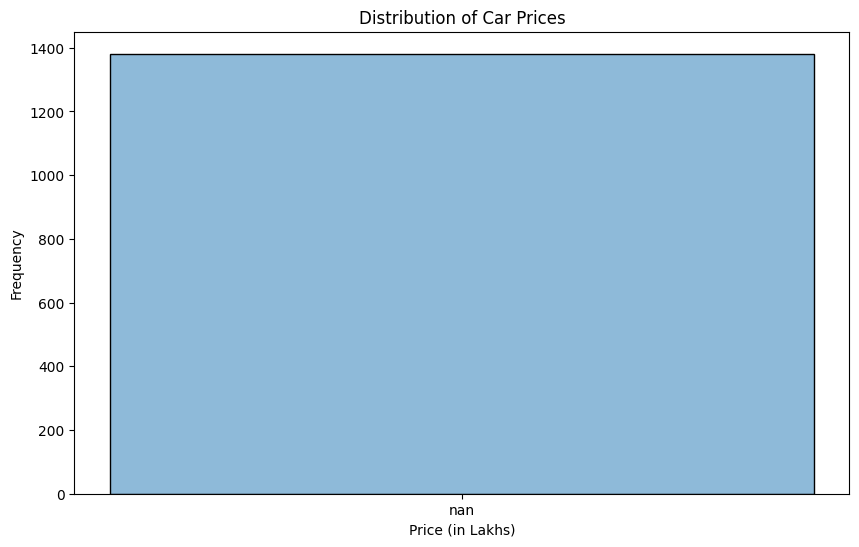

In [ ]:
# Plot the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in Lakhs)')
plt.ylabel('Frequency')
plt.show()

#JAIPUR

In [ ]:
# Load the Excel file
file_path = '/content/jaipur_cars.xlsx'  # Update with your file path
df_jaipur = pd.read_excel(file_path, sheet_name='jaipur_cars.csv')  # Use a different variable name

# Display the first few rows
print(df_jaipur.head())

# ... (rest of your code for Jaipur data processing) ...

# Convert 'price' column to string type before applying string operations
# Check if the 'price' column exists in the DataFrame before accessing it
if 'price' in df_jaipur.columns: # Check if 'price' column exists
    df_jaipur['price'] = df_jaipur['price'].astype(str)
    # ... any further operations on 'price' column ...
else:
    print("Column 'price' not found in the DataFrame.")

# Extract relevant features from 'new_car_detail' for df_jaipur
if 'new_car_detail' in df_jaipur.columns:
    df_jaipur['fuel_type'] = df_jaipur['new_car_detail'].apply(lambda x: x.get('ft', np.nan) if isinstance(x, dict) else np.nan)
    df_jaipur['body_type'] = df_jaipur['new_car_detail'].apply(lambda x: x.get('bt', np.nan) if isinstance(x, dict) else np.nan)
    df_jaipur['km_driven'] = df_jaipur['new_car_detail'].apply(lambda x: x.get('km', np.nan) if isinstance(x, dict) else np.nan)
    df_jaipur['transmission'] = df_jaipur['new_car_detail'].apply(lambda x: x.get('transmission', np.nan) if isinstance(x, dict) else np.nan)
    df_jaipur['owner'] = df_jaipur['new_car_detail'].apply(lambda x: x.get('owner', np.nan) if isinstance(x, dict) else np.nan)
    df_jaipur['oem'] = df_jaipur['new_car_detail'].apply(lambda x: x.get('oem', np.nan) if isinstance(x, dict) else np.nan)
    df_jaipur['model'] = df_jaipur['new_car_detail'].apply(lambda x: x.get('model', np.nan) if isinstance(x, dict) else np.nan)
    df_jaipur['model_year'] = df_jaipur['new_car_detail'].apply(lambda x: x.get('modelYear', np.nan) if isinstance(x, dict) else np.nan)


# Now you can drop the 'new_car_detail' column
try:
    df_jaipur = df_jaipur.drop(columns=['new_car_detail']) # Use df_jaipur instead of df
except KeyError:
    print("Column 'new_car_detail' already dropped or doesn't exist.")

# ... (rest of your code for Jaipur data processing) ...

                                      new_car_detail  \
0  {'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...   
1  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
2  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
3  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
4  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   

                                    new_car_overview  \
0  {'heading': 'Car overview', 'top': [{'key': 'R...   
1  {'heading': 'Car overview', 'top': [{'key': 'R...   
2  {'heading': 'Car overview', 'top': [{'key': 'R...   
3  {'heading': 'Car overview', 'top': [{'key': 'R...   
4  {'heading': 'Car overview', 'top': [{'key': 'R...   

                                     new_car_feature  \
0  {'heading': 'Features', 'top': [{'value': 'Pow...   
1  {'heading': 'Features', 'top': [{'value': 'Pow...   
2  {'heading': 'Features', 'top': [{'value': 'Pow...   
3  {'heading': 'Features', 'top': [{'value': 'Pow...   
4  {'heading': 'Features', 'top': [{'value': '

In [ ]:
# Extract relevant features from 'new_car_detail' for df_jaipur
if 'new_car_detail' in df_jaipur.columns:
    df_jaipur['fuel_type'] = df_jaipur['new_car_detail'].apply(lambda x: x.get('ft', np.nan) if isinstance(x, dict) else np.nan)
    df_jaipur['body_type'] = df_jaipur['new_car_detail'].apply(lambda x: x.get('bt', np.nan) if isinstance(x, dict) else np.nan)
    df_jaipur['km_driven'] = df_jaipur['new_car_detail'].apply(lambda x: x.get('km', np.nan) if isinstance(x, dict) else np.nan)
    df_jaipur['transmission'] = df_jaipur['new_car_detail'].apply(lambda x: x.get('transmission', np.nan) if isinstance(x, dict) else np.nan)
    df_jaipur['owner'] = df_jaipur['new_car_detail'].apply(lambda x: x.get('owner', np.nan) if isinstance(x, dict) else np.nan)
    df_jaipur['oem'] = df_jaipur['new_car_detail'].apply(lambda x: x.get('oem', np.nan) if isinstance(x, dict) else np.nan)
    df_jaipur['model'] = df_jaipur['new_car_detail'].apply(lambda x: x.get('model', np.nan) if isinstance(x, dict) else np.nan)
    df_jaipur['model_year'] = df_jaipur['new_car_detail'].apply(lambda x: x.get('modelYear', np.nan) if isinstance(x, dict) else np.nan)

# Now you can continue with the rest of your code:
# ... (rest of your code for Jaipur data processing) ...

# Fill missing values (if any)
if not pd.api.types.is_numeric_dtype(df_jaipur['km_driven']):
    df_jaipur['km_driven'] = df_jaipur['km_driven'].str.replace(',', '', regex=False).astype(float)
df_jaipur['km_driven'].fillna(df_jaipur['km_driven'].median(), inplace=True)

<ipython-input-63-ee700a700796>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_jaipur['km_driven'].fillna(df_jaipur['km_driven'].median(), inplace=True)


In [ ]:
# Plot the distribution of car prices
plt.figure(figsize=(10, 6))
# Make sure 'price' column exists and is numeric
if 'price' in df_jaipur.columns and pd.api.types.is_numeric_dtype(df_jaipur['price']):
    sns.histplot(df_jaipur['price'], bins=30, kde=True) # Use df_jaipur instead of df
    plt.title('Distribution of Car Prices')
    plt.xlabel('Price (in Lakhs)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'price' not found or not numeric in the DataFrame.")

Column 'price' not found or not numeric in the DataFrame.


<Figure size 1000x600 with 0 Axes>

#HYDERABAD

In [ ]:
# Load the Excel file
file_path = '/content/hyderabad_cars clean_data.xlsx'  # Update with your file path
df = pd.read_excel(file_path, sheet_name='hyderabad_cars.csv')

# Display the first few rows
print(df.head())

# Check if 'price' column exists, if not try 'Price'
if 'price' not in df.columns:
    if 'Price' in df.columns:  # Check for 'Price' column
        print("Column 'price' not found, renaming 'Price' to 'price'")
        df.rename(columns={'Price': 'price'}, inplace=True)  # Rename to 'price'
    else:
        print("Column 'price' or 'Price' not found in the DataFrame.")
        # Possible solutions:
        # 1. Check the sheet name and file path to ensure they are correct.
        # 2. Check the actual column name in the Excel file and use that name instead of 'price'.
        # 3. If the column is missing, you might need to investigate why and potentially fix the data source.
        # For now, I'll stop execution to prevent further errors.
        # import sys; sys.exit()  # Uncomment to stop execution if 'price' is essential

# Convert 'price' column to string type before applying string operations (if it exists)
if 'price' in df.columns:
    df['price'] = df['price'].astype(str)

    # Convert price to numeric
    # ... (your code to convert price to numeric) ...

                                      new_car_detail  \
0  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
1  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
2  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
3  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
4  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   

                                    new_car_overview  \
0  {'heading': 'Car overview', 'top': [{'key': 'R...   
1  {'heading': 'Car overview', 'top': [{'key': 'R...   
2  {'heading': 'Car overview', 'top': [{'key': 'R...   
3  {'heading': 'Car overview', 'top': [{'key': 'R...   
4  {'heading': 'Car overview', 'top': [{'key': 'R...   

                                     new_car_feature new_car_specs  car_links  \
0  {'heading': 'Features', 'top': [{'value': 'Pow...           NaN        NaN   
1  {'heading': 'Features', 'top': [{'value': 'Pow...       Mileage   21.1 kmp   
2  {'heading': 'Features', 'top': [{'value': 'Pow...        Engine    1197 CC   
3 

In [ ]:
# Drop unnecessary columns
# These columns are probably already removed or renamed after extracting features in the previous cell.
# Instead, drop only 'new_car_detail' if it still exists.
try:
    df = df.drop(columns=['new_car_detail'])
except KeyError:
    print("Column 'new_car_detail' already dropped or doesn't exist.")

# If you still want to remove specific columns, double-check their names in the DataFrame:
# print(df.columns)  # Print the current columns of the DataFrame
# Then drop the columns that actually exist using their correct names.

In [ ]:
# Display the cleaned dataframe
print(df.head())

                                    new_car_overview  \
0  {'heading': 'Car overview', 'top': [{'key': 'R...   
1  {'heading': 'Car overview', 'top': [{'key': 'R...   
2  {'heading': 'Car overview', 'top': [{'key': 'R...   
3  {'heading': 'Car overview', 'top': [{'key': 'R...   
4  {'heading': 'Car overview', 'top': [{'key': 'R...   

                                     new_car_feature new_car_specs  car_links  \
0  {'heading': 'Features', 'top': [{'value': 'Pow...           NaN        NaN   
1  {'heading': 'Features', 'top': [{'value': 'Pow...       Mileage   21.1 kmp   
2  {'heading': 'Features', 'top': [{'value': 'Pow...        Engine    1197 CC   
3  {'heading': 'Features', 'top': [{'value': 'Pow...       Mileage   21.4 kmp   
4  {'heading': 'Features', 'top': [{'value': 'Pow...        Engine    1997 CC   

            Unnamed: 5           Unnamed: 6           Unnamed: 7  \
0                  NaN                  NaN                  NaN   
1     {'key': 'Engine'    value': '814 C

In [ ]:

# Fill missing values (if any)
# Check if 'km_driven' is not already numeric (float)
if not pd.api.types.is_numeric_dtype(df['km_driven']):
    df['km_driven'] = df['km_driven'].str.replace(',', '', regex=False).astype(float)
df['km_driven'].fillna(df['km_driven'].median(), inplace=True)

<ipython-input-88-44e1aa4d643e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['km_driven'].fillna(df['km_driven'].median(), inplace=True)


In [ ]:
# Plot the distribution of car prices
plt.figure(figsize=(10, 6))

# Check if 'price' column exists, if not try 'Price'
if 'price' not in df.columns:
    if 'Price' in df.columns:  # Check for 'Price' column
        print("Column 'price' not found, renaming 'Price' to 'price'")
        df.rename(columns={'Price': 'price'}, inplace=True)  # Rename to 'price'
    else:
        print("Column 'price' or 'Price' not found in the DataFrame.")
        # Possible solutions:
        # 1. Check the sheet name and file path to ensure they are correct.
        # 2. Check the actual column name in the Excel file and use that name instead of 'price'.
        # 3. If the column is missing, you might need to investigate why and potentially fix the data source.
        # For now, I'll stop execution to prevent further errors.
        # import sys; sys.exit()  # Uncomment to stop execution if 'price' is essential

# If 'price' column exists after the check, proceed with plotting
if 'price' in df.columns:
    sns.histplot(df['price'], bins=30, kde=True)
    plt.title('Distribution of Car Prices')
    plt.xlabel('Price (in Lakhs)')
    plt.ylabel('Frequency')
    plt.show()

Column 'price' or 'Price' not found in the DataFrame.


<Figure size 1000x600 with 0 Axes>

#DELHI


In [ ]:
# Load the Excel file
file_path = '/content/delhi_cars.xlsx'  # Update with your file path
df = pd.read_excel(file_path, sheet_name='delhi_cars.csv')

# Display the first few rows
print(df.head())

# Check if 'price' column exists, if not try 'Price'
if 'price' not in df.columns:
    if 'Price' in df.columns:  # Check for 'Price' column
        print("Column 'price' not found, renaming 'Price' to 'price'")
        df.rename(columns={'Price': 'price'}, inplace=True)  # Rename to 'price'
    else:
        print("Column 'price' or 'Price' not found in the DataFrame.")
        # Possible solutions:
        # 1. Check the sheet name and file path to ensure they are correct.
        # 2. Check the actual column name in the Excel file and use that name instead of 'price'.
        # 3. If the column is missing, you might need to investigate why and potentially fix the data source.
        # For now, I'll stop execution to prevent further errors.
        # import sys; sys.exit()  # Uncomment to stop execution if 'price' is essential

# Convert 'price' column to string type before applying string operations (if it exists)
if 'price' in df.columns:
    df['price'] = df['price'].astype(str)

    # Convert price to numeric
    # ... (your code to convert price to numeric) ...

                                      new_car_detail  \
0  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   
1  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
2  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
3  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
4  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   

                                    new_car_overview  \
0  {'heading': 'Car overview', 'top': [{'key': 'R...   
1  {'heading': 'Car overview', 'top': [{'key': 'R...   
2  {'heading': 'Car overview', 'top': [{'key': 'R...   
3  {'heading': 'Car overview', 'top': [{'key': 'R...   
4  {'heading': 'Car overview', 'top': [{'key': 'R...   

                                     new_car_feature  \
0  {'heading': 'Features', 'top': [{'value': 'Pow...   
1  {'heading': 'Features', 'top': [{'value': 'Pow...   
2  {'heading': 'Features', 'top': [{'value': 'Pow...   
3  {'heading': 'Features', 'top': [{'value': 'Pow...   
4  {'heading': 'Features', 'top': [{'value': '

In [ ]:
# Drop unnecessary columns
# These columns are probably already removed or renamed after extracting features in the previous cell.
# Instead, drop only 'new_car_detail' if it still exists.
try:
    df = df.drop(columns=['new_car_detail'])
except KeyError:
    print("Column 'new_car_detail' already dropped or doesn't exist.")

# If you still want to remove specific columns, double-check their names in the DataFrame:
# print(df.columns)  # Print the current columns of the DataFrame
# Then drop the columns that actually exist using their correct names.

In [ ]:
# Display the cleaned dataframe
print(df.head())

                                    new_car_overview  \
0  {'heading': 'Car overview', 'top': [{'key': 'R...   
1  {'heading': 'Car overview', 'top': [{'key': 'R...   
2  {'heading': 'Car overview', 'top': [{'key': 'R...   
3  {'heading': 'Car overview', 'top': [{'key': 'R...   
4  {'heading': 'Car overview', 'top': [{'key': 'R...   

                                     new_car_feature  \
0  {'heading': 'Features', 'top': [{'value': 'Pow...   
1  {'heading': 'Features', 'top': [{'value': 'Pow...   
2  {'heading': 'Features', 'top': [{'value': 'Pow...   
3  {'heading': 'Features', 'top': [{'value': 'Pow...   
4  {'heading': 'Features', 'top': [{'value': 'Pow...   

                                       new_car_specs  \
0  {'heading': 'Specifications', 'top': [{'key': ...   
1  {'heading': 'Specifications', 'top': [{'key': ...   
2  {'heading': 'Specifications', 'top': [{'key': ...   
3  {'heading': 'Specifications', 'top': [{'key': ...   
4  {'heading': 'Specifications', 'top': [{'key

In [ ]:
# Fill missing values (if any)
# Check if 'km_driven' is not already numeric (float)
if not pd.api.types.is_numeric_dtype(df['km_driven']):
    df['km_driven'] = df['km_driven'].str.replace(',', '', regex=False).astype(float)
df['km_driven'].fillna(df['km_driven'].median(), inplace=True)

<ipython-input-97-44e1aa4d643e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['km_driven'].fillna(df['km_driven'].median(), inplace=True)


In [ ]:
# Plot the distribution of car prices
plt.figure(figsize=(10, 6))

# Check if 'price' column exists, if not try 'Price'
if 'price' not in df.columns:
    if 'Price' in df.columns:  # Check for 'Price' column
        print("Column 'price' not found, renaming 'Price' to 'price'")
        df.rename(columns={'Price': 'price'}, inplace=True)  # Rename to 'price'
    else:
        print("Column 'price' or 'Price' not found in the DataFrame.")
        # Possible solutions:
        # 1. Check the sheet name and file path to ensure they are correct.
        # 2. Check the actual column name in the Excel file and use that name instead of 'price'.
        # 3. If the column is missing, you might need to investigate why and potentially fix the data source.
        # For now, I'll stop execution to prevent further errors.
        # import sys; sys.exit()  # Uncomment to stop execution if 'price' is essential

# If 'price' column exists after the check, proceed with plotting
if 'price' in df.columns:
    sns.histplot(df['price'], bins=30, kde=True)
    plt.title('Distribution of Car Prices')
    plt.xlabel('Price (in Lakhs)')
    plt.ylabel('Frequency')
    plt.show()

Column 'price' or 'Price' not found in the DataFrame.


<Figure size 1000x600 with 0 Axes>

#CHENNAI

In [ ]:
# Load the Excel file
file_path = '/content/chennai_cars.xlsx'  # Update with your file path
df = pd.read_excel(file_path, sheet_name='chennai_cars.csv')

# Display the first few rows
print(df.head())

# Check if 'price' column exists, if not try 'Price'
if 'price' not in df.columns:
    if 'Price' in df.columns:  # Check for 'Price' column
        print("Column 'price' not found, renaming 'Price' to 'price'")
        df.rename(columns={'Price': 'price'}, inplace=True)  # Rename to 'price'
    else:
        print("Column 'price' or 'Price' not found in the DataFrame.")
        # Possible solutions:
        # 1. Check the sheet name and file path to ensure they are correct.
        # 2. Check the actual column name in the Excel file and use that name instead of 'price'.
        # 3. If the column is missing, you might need to investigate why and potentially fix the data source.
        # For now, I'll stop execution to prevent further errors.
        # import sys; sys.exit()  # Uncomment to stop execution if 'price' is essential

# Convert 'price' column to string type before applying string operations (if it exists)
if 'price' in df.columns:
    df['price'] = df['price'].astype(str)

    # Convert price to numeric
    # ... (your code to convert price to numeric) ...

                                      new_car_detail  \
0  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
1  {'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...   
2  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
3  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
4  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   

                                    new_car_overview  \
0  {'heading': 'Car overview', 'top': [{'key': 'R...   
1  {'heading': 'Car overview', 'top': [{'key': 'R...   
2  {'heading': 'Car overview', 'top': [{'key': 'R...   
3  {'heading': 'Car overview', 'top': [{'key': 'R...   
4  {'heading': 'Car overview', 'top': [{'key': 'R...   

                                     new_car_feature  \
0  {'heading': 'Features', 'top': [{'value': 'Pow...   
1  {'heading': 'Features', 'top': [{'value': 'Low...   
2  {'heading': 'Features', 'top': [{'value': 'Pow...   
3  {'heading': 'Features', 'top': [{'value': 'Pow...   
4  {'heading': 'Features', 'top': [{'value': '

In [ ]:
# Drop unnecessary columns
# These columns are probably already removed or renamed after extracting features in the previous cell.
# Instead, drop only 'new_car_detail' if it still exists.
try:
    df = df.drop(columns=['new_car_detail'])
except KeyError:
    print("Column 'new_car_detail' already dropped or doesn't exist.")

# If you still want to remove specific columns, double-check their names in the DataFrame:
# print(df.columns)  # Print the current columns of the DataFrame
# Then drop the columns that actually exist using their correct names.

In [ ]:
# Display the cleaned dataframe
print(df.head())

                                    new_car_overview  \
0  {'heading': 'Car overview', 'top': [{'key': 'R...   
1  {'heading': 'Car overview', 'top': [{'key': 'R...   
2  {'heading': 'Car overview', 'top': [{'key': 'R...   
3  {'heading': 'Car overview', 'top': [{'key': 'R...   
4  {'heading': 'Car overview', 'top': [{'key': 'R...   

                                     new_car_feature  \
0  {'heading': 'Features', 'top': [{'value': 'Pow...   
1  {'heading': 'Features', 'top': [{'value': 'Low...   
2  {'heading': 'Features', 'top': [{'value': 'Pow...   
3  {'heading': 'Features', 'top': [{'value': 'Pow...   
4  {'heading': 'Features', 'top': [{'value': 'Pow...   

                                       new_car_specs  
0  {'heading': 'Specifications', 'top': [{'key': ...  
1  {'heading': 'Specifications', 'top': [{'key': ...  
2  {'heading': 'Specifications', 'top': [{'key': ...  
3  {'heading': 'Specifications', 'top': [{'key': ...  
4  {'heading': 'Specifications', 'top': [{'key': ..

In [ ]:
# Fill missing values (if any)
# Check if 'km_driven' is not already numeric (float)
if not pd.api.types.is_numeric_dtype(df['km_driven']):
    df['km_driven'] = df['km_driven'].str.replace(',', '', regex=False).astype(float)
df['km_driven'].fillna(df['km_driven'].median(), inplace=True)

<ipython-input-109-44e1aa4d643e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['km_driven'].fillna(df['km_driven'].median(), inplace=True)


In [ ]:
# Plot the distribution of car prices
plt.figure(figsize=(10, 6))

# Check if 'price' column exists, if not try 'Price'
if 'price' not in df.columns:
    if 'Price' in df.columns:  # Check for 'Price' column
        print("Column 'price' not found, renaming 'Price' to 'price'")
        df.rename(columns={'Price': 'price'}, inplace=True)  # Rename to 'price'
    else:
        print("Column 'price' or 'Price' not found in the DataFrame.")
        # Possible solutions:
        # 1. Check the sheet name and file path to ensure they are correct.
        # 2. Check the actual column name in the Excel file and use that name instead of 'price'.
        # 3. If the column is missing, you might need to investigate why and potentially fix the data source.
        # For now, I'll stop execution to prevent further errors.
        # import sys; sys.exit()  # Uncomment to stop execution if 'price' is essential

# If 'price' column exists after the check, proceed with plotting
if 'price' in df.columns:
    # Convert 'price' to numeric if it's not already
    if not pd.api.types.is_numeric_dtype(df['price']):
        df['price'] = pd.to_numeric(df['price'], errors='coerce') # Convert to numeric, handle errors

    sns.histplot(df['price'], bins=30, kde=True)
    plt.title('Distribution of Car Prices')
    plt.xlabel('Price (in Lakhs)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'price' not found for plotting.") # More informative message

Column 'price' or 'Price' not found in the DataFrame.
Column 'price' not found for plotting.


<Figure size 1000x600 with 0 Axes>

#BANGALORE


In [ ]:
# Load the Excel file
file_path = '/content/bangalore_cars.xlsx'  # Update with your file path
df = pd.read_excel(file_path, sheet_name='bangalore_cars.csv')

# Display the first few rows
print(df.head())

# Check if 'price' column exists, if not try 'Price'
if 'price' not in df.columns:
    if 'Price' in df.columns:  # Check for 'Price' column
        print("Column 'price' not found, renaming 'Price' to 'price'")
        df.rename(columns={'Price': 'price'}, inplace=True)  # Rename to 'price'
    else:
        print("Column 'price' or 'Price' not found in the DataFrame.")
        # Possible solutions:
        # 1. Check the sheet name and file path to ensure they are correct.
        # 2. Check the actual column name in the Excel file and use that name instead of 'price'.
        # 3. If the column is missing, you might need to investigate why and potentially fix the data source.
        # For now, I'll stop execution to prevent further errors.
        # import sys; sys.exit()  # Uncomment to stop execution if 'price' is essential

# Convert 'price' column to string type before applying string operations (if it exists)
if 'price' in df.columns:
    df['price'] = df['price'].astype(str)

    # Convert price to numeric
    # ... (your code to convert price to numeric) ...

                                      new_car_detail  \
0  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
1  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
2  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
3  {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...   
4  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   

                                    new_car_overview  \
0  {'heading': 'Car overview', 'top': [{'key': 'R...   
1  {'heading': 'Car overview', 'top': [{'key': 'R...   
2  {'heading': 'Car overview', 'top': [{'key': 'R...   
3  {'heading': 'Car overview', 'top': [{'key': 'R...   
4  {'heading': 'Car overview', 'top': [{'key': 'R...   

                                     new_car_feature  \
0  {'heading': 'Features', 'top': [{'value': 'Pow...   
1  {'heading': 'Features', 'top': [{'value': 'Pow...   
2  {'heading': 'Features', 'top': [{'value': 'Pow...   
3  {'heading': 'Features', 'top': [{'value': 'Pow...   
4  {'heading': 'Features', 'top': [{'value': '

In [ ]:
# Drop unnecessary columns
# These columns are probably already removed or renamed after extracting features in the previous cell.
# Instead, drop only 'new_car_detail' if it still exists.
try:
    df = df.drop(columns=['new_car_detail'])
except KeyError:
    print("Column 'new_car_detail' already dropped or doesn't exist.")

# If you still want to remove specific columns, double-check their names in the DataFrame:
# print(df.columns)  # Print the current columns of the DataFrame
# Then drop the columns that actually exist using their correct names.

In [ ]:
# Display the cleaned dataframe
print(df.head())

                                      new_car_detail  \
0  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
1  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
2  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
3  {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...   
4  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   

                                    new_car_overview  \
0  {'heading': 'Car overview', 'top': [{'key': 'R...   
1  {'heading': 'Car overview', 'top': [{'key': 'R...   
2  {'heading': 'Car overview', 'top': [{'key': 'R...   
3  {'heading': 'Car overview', 'top': [{'key': 'R...   
4  {'heading': 'Car overview', 'top': [{'key': 'R...   

                                     new_car_feature  \
0  {'heading': 'Features', 'top': [{'value': 'Pow...   
1  {'heading': 'Features', 'top': [{'value': 'Pow...   
2  {'heading': 'Features', 'top': [{'value': 'Pow...   
3  {'heading': 'Features', 'top': [{'value': 'Pow...   
4  {'heading': 'Features', 'top': [{'value': '

In [ ]:
# Fill missing values (if any)
# Check if 'km_driven' is not already numeric (float)
if not pd.api.types.is_numeric_dtype(df['km_driven']):
    df['km_driven'] = df['km_driven'].str.replace(',', '', regex=False).astype(float)
df['km_driven'].fillna(df['km_driven'].median(), inplace=True)

<ipython-input-122-44e1aa4d643e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['km_driven'].fillna(df['km_driven'].median(), inplace=True)


In [ ]:
# Plot the distribution of car prices
plt.figure(figsize=(10, 6))

# Check if 'price' column exists, if not try 'Price'
if 'price' not in df.columns:
    if 'Price' in df.columns:  # Check for 'Price' column
        print("Column 'price' not found, renaming 'Price' to 'price'")
        df.rename(columns={'Price': 'price'}, inplace=True)  # Rename to 'price'
    else:
        print("Column 'price' or 'Price' not found in the DataFrame.")
        # Possible solutions:
        # 1. Check the sheet name and file path to ensure they are correct.
        # 2. Check the actual column name in the Excel file and use that name instead of 'price'.
        # 3. If the column is missing, you might need to investigate why and potentially fix the data source.
        # For now, I'll stop execution to prevent further errors.
        # import sys; sys.exit()  # Uncomment to stop execution if 'price' is essential

# If 'price' column exists after the check, proceed with plotting
if 'price' in df.columns:
    sns.histplot(df['price'], bins=30, kde=True)
    plt.title('Distribution of Car Prices')
    plt.xlabel('Price (in Lakhs)')
    plt.ylabel('Frequency')
    plt.show()

Column 'price' or 'Price' not found in the DataFrame.


<Figure size 1000x600 with 0 Axes>